In [57]:
import numpy as np
from sklearn.datasets import fetch_california_housing

In [58]:
dataset = fetch_california_housing()

In [59]:
x = dataset.data
y = dataset.target

## Lineare Regression

### Bedeutung

- $R^2$: Wie viel Streuung kann von dem Regressionsmodell erklärt werden
- coef: Steigung der Geraden
- intercept: y-Achsenabschnitt

### Symbole

- $\bar{x}$: Mittelwert von $x$
- $\bar{y}$: Mittelwert von $y$
- $\hat{y}$: Prediktion vom Modell

### Datensatz

- $m$: Anzahl an Samples
- $n$: Anzahl an Features
- $x$: Input-Daten (Features)
- $y$: Output Daten (Targets)

### Variablen

- $x \in \mathbb{R}^{m,n}$
- $y \in \mathbb{R}^{m,}$
- coef, $\bar{x} \in \mathbb{R}^{n}$
- intercept, $\bar{y} \in \mathbb{R}$

### Formeln

- $\beta = (X^TX)^{-1}X^Ty$
- coef = $\beta$\[1:\]
- intercept = $\beta$\[0\]
- $\hat{y} = X\beta$
- $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$


In [60]:
from sklearn.metrics import r2_score

In [61]:
class LinearRegression:
    def __init__(self, use_intercept: bool = True) -> None:
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None
        self.use_intercept = use_intercept

    def _add_intercept(self, x: np.ndarray) -> np.ndarray:
        intercepts = np.ones(shape=(x.shape[0]))
        x = np.column_stack((intercepts, x))
        return x

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        if self.use_intercept:
            x = self._add_intercept(x)
        inner = np.dot(x.T, x)
        inv = np.linalg.inv(inner)
        beta = np.dot(np.dot(inv, x.T), y)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, x: np.ndarray) -> None:
        y_pred = x * self.coef_ + self.intercept_
        return y_pred

    def score(self, x: np.ndarray, y: np.ndarray) -> None:
        y_pred = self.predict(x)
        return r2_score(y, y_pred)

In [62]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [63]:
x = dataset.data[:, [0]]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [66]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2 = regr.score(x_test, y_test)

print(f"r2: {r2}")
print(f"m: {regr.coef_}")
print(f"b: {regr.intercept_}")

r2: 0.46932064680668617
m: [0.41821687]
b: 0.4502753610153806


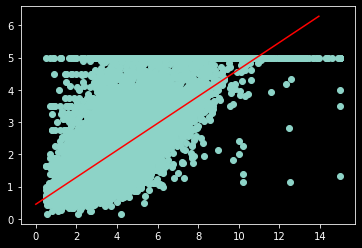

In [65]:
x_values = np.arange(start=0.0, stop=14.0, step=0.05).reshape((-1, 1))
y_values = regr.predict(x_values)

plt.scatter(x_train, y_train)
plt.plot(x_values, y_values, color="red")
plt.show()